In [9]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from models import noresm
from grid import Grid
import pyproj

In [6]:
##specify the path where grid.nc is located
path = './'

##if grid.nc is not provided, the noresm module will try to generate one
##from locally stored data: grid_type is tripolar (192x180) or bipolar (192x160)
##scale_x, scale_y is 1 by default, smaller means refined grid
grid = noresm.read_grid(path, grid_type='tripolar', scale_x=0.5, scale_y=0.5)


In [13]:
##sample sea ice data file
filename = '/Users/yueng/scratch/siconc_SIday_NorESM2-MM_1970-2040.nc'
with Dataset(filename) as f:
    sic = f['siconc'][0, :, :].filled(np.nan)

##vector fields


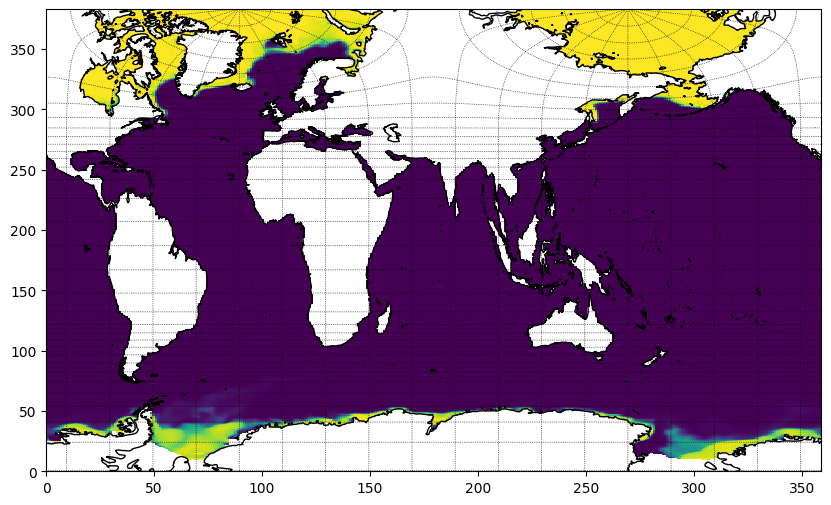

In [14]:
##show data on original noresm grid
fig, ax = plt.subplots(1,1,figsize=(10,6))

grid.plot_field(ax, sic)
grid.plot_land(ax)


In [15]:
##convert to another grid

grid2 = Grid.regular_grid(pyproj.Proj('+proj=stere +lat_0=90'), -4e6, 4e6, -4e6, 4e6, 2e4)

grid.set_destination_grid(grid2)

sic_ = grid.convert(sic, method='linear')



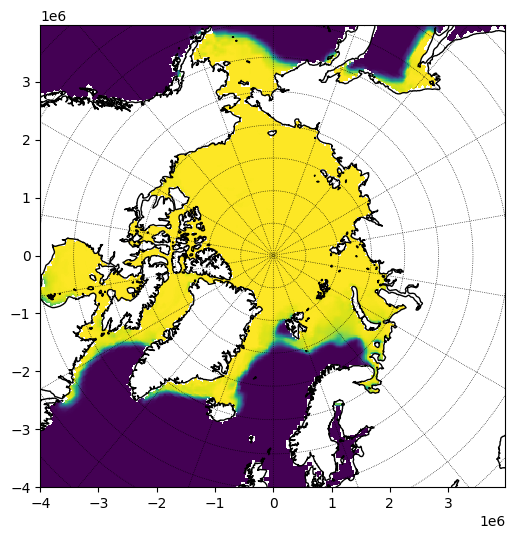

In [16]:
##plot on new grid
fig, ax = plt.subplots(1,1,figsize=(6,6))

grid2.plot_field(ax, sic_)
grid2.plot_land(ax)
